# Weather predictor 

## _Kaggle: https://www.kaggle.com/datasets/budincsevity/szeged-weather_ 
## _Author: Sampreet Kishan (sampy.prithvi2@gmail.com)_
## _Modified: June 23nd, 2024_

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
#Let's read the data 
raw_dataset = pd.read_csv("weatherHistory.csv") 
raw_dataset.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
#We are only going to deal with numerical values 
raw_dataset_cleansed = raw_dataset[['Temperature (C)', 
                                    'Apparent Temperature (C)',
                                    'Humidity',
                                    'Wind Speed (km/h)',
                                    'Wind Bearing (degrees)',
                                    'Visibility (km)',
                                    #'Loud Cover',
                                    'Pressure (millibars)'
                                   ]]
#raw_dataset_cleansed['Loud Cover'] = raw_dataset_cleansed['Loud Cover'].fillna(0)
print(raw_dataset_cleansed.head(5))
print(raw_dataset_cleansed.info())

   Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0         9.472222                  7.388889      0.89            14.1197   
1         9.355556                  7.227778      0.86            14.2646   
2         9.377778                  9.377778      0.89             3.9284   
3         8.288889                  5.944444      0.83            14.1036   
4         8.755556                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  
0                   251.0          15.8263               1015.13  
1                   259.0          15.8263               1015.63  
2                   204.0          14.9569               1015.94  
3                   269.0          15.8263               1016.41  
4                   259.0          15.8263               1016.51  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
 #   Column                

In [6]:
#Let's try to find any corr between the numerical variables
#raw_dataset_cleansed = df.reset_index(drop=True)
raw_dataset_cleansed.corr().style.background_gradient(cmap='plasma')

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


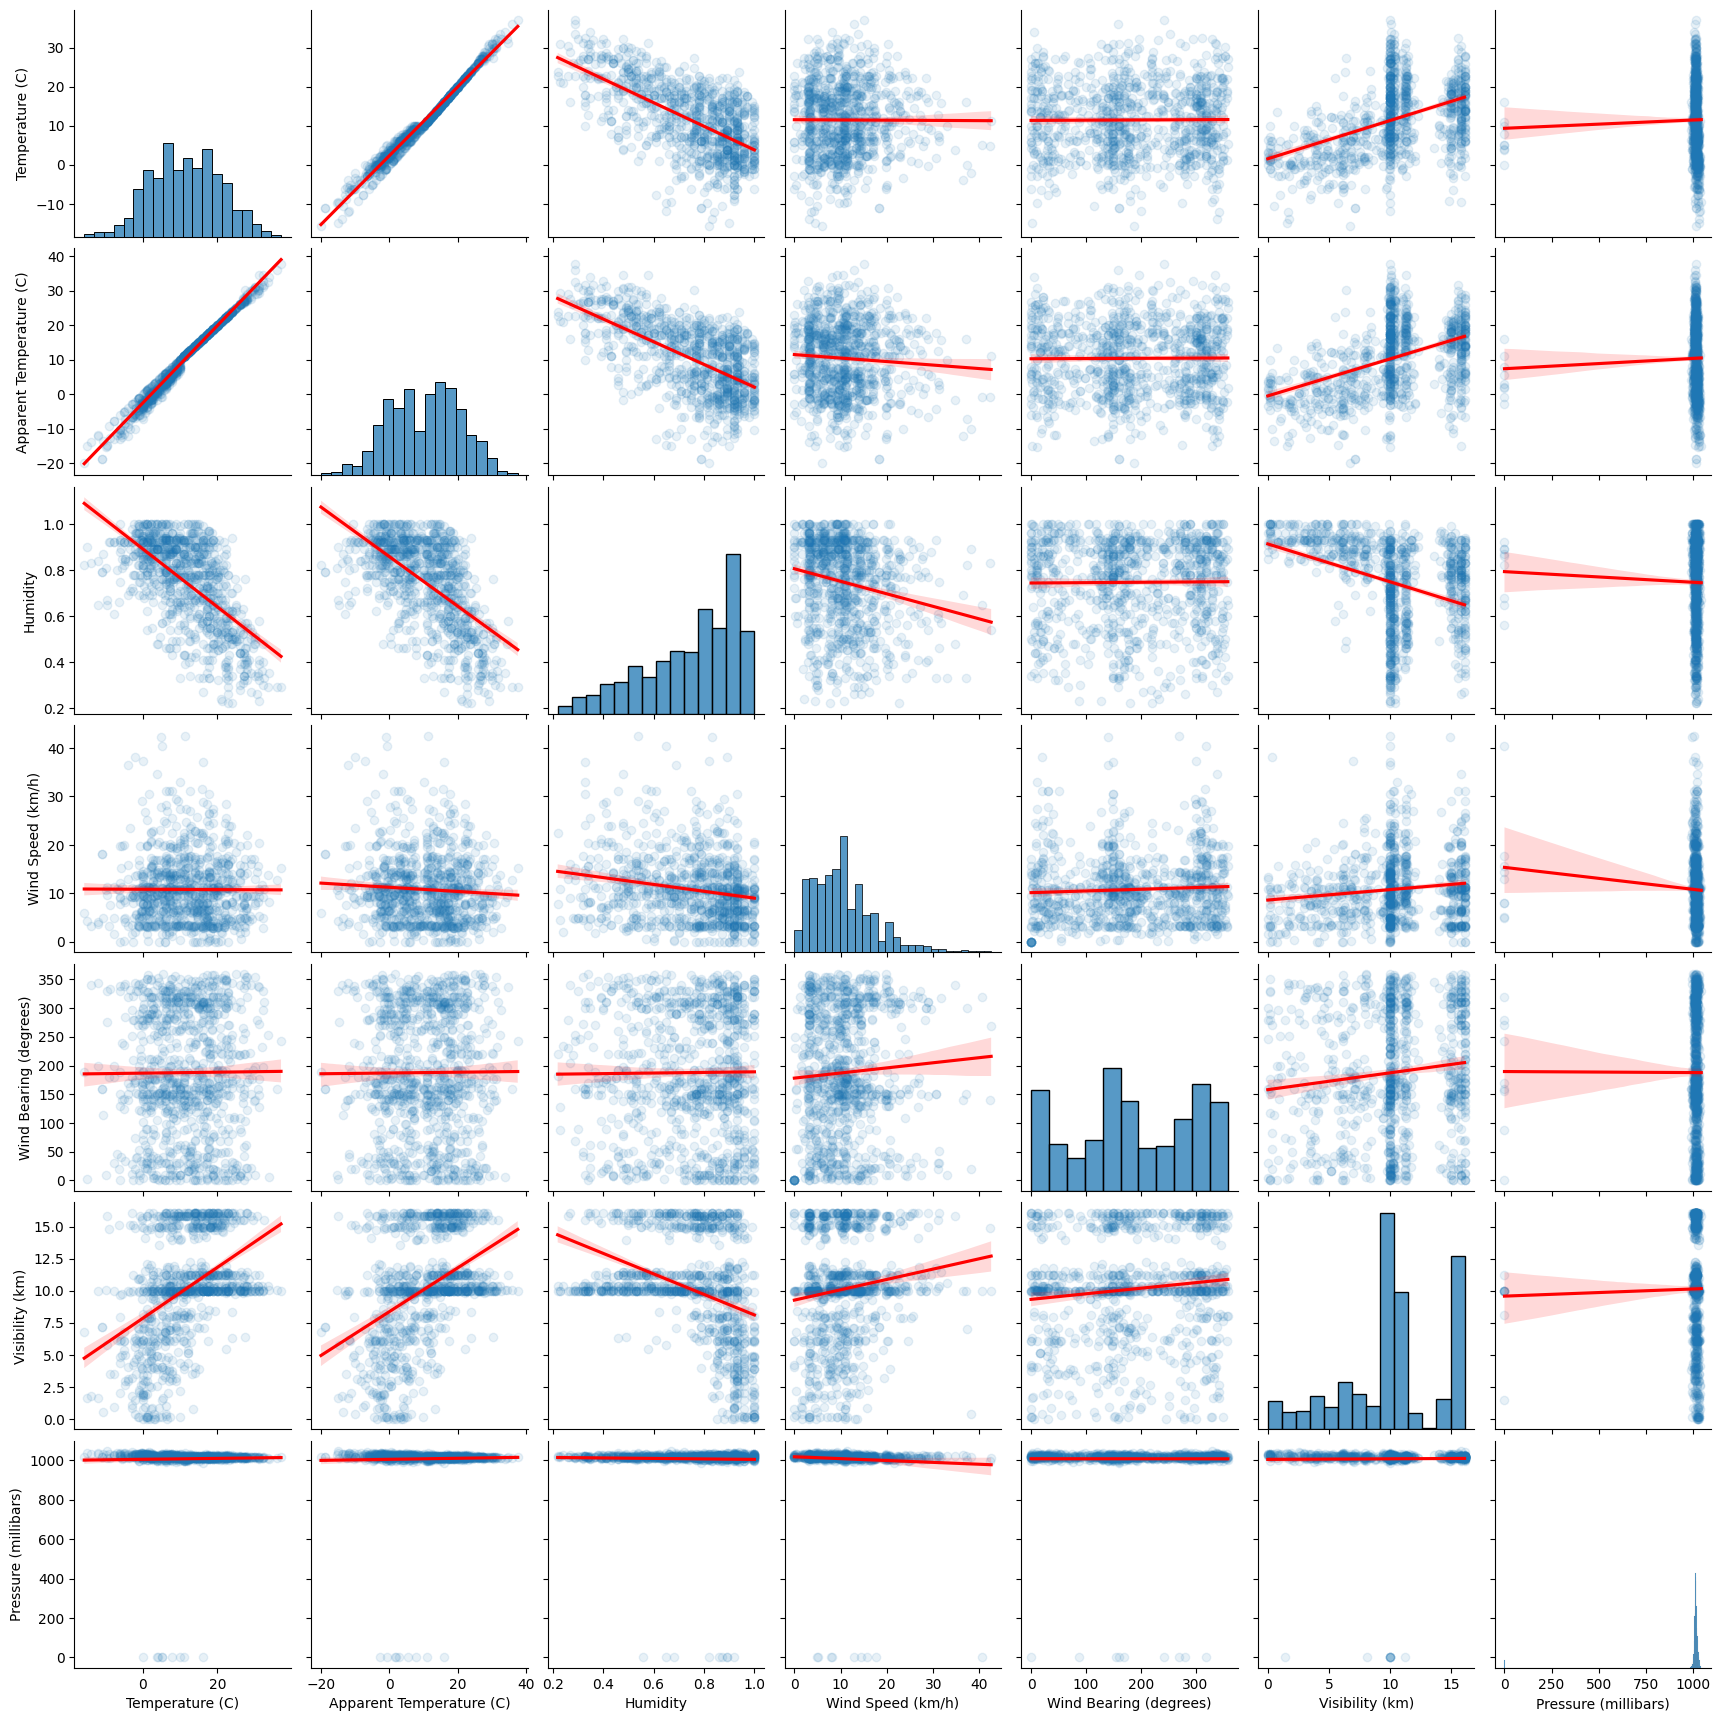

In [7]:
#Let's sample the data (94563 lines by 1%) so we can see the data on the visuals clearly

sns.pairplot(
            raw_dataset_cleansed.sample(frac=0.01, replace=True, random_state=1), #sampling data by 1% 
             kind='reg', 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}}
            )

## _Looks like as humidity increase, the apparent temperature and temperature change_ 

## Question1: Can you predict the apparent temperature given the humidity AND OTHER variables?


In [8]:
# We can use a linear model

#Let's first split the dataset into train and test 
from sklearn.model_selection import train_test_split


x_dataset = raw_dataset_cleansed[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y_dataset = raw_dataset_cleansed['Apparent Temperature (C)']

x_train, x_test, y_train, y_test = train_test_split(
    x_dataset, y_dataset, test_size=0.33, random_state=42)


x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [9]:
type(y_train)

pandas.core.frame.DataFrame

In [10]:
#Let's build the linear regression model 
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

#Train the model 
regr.fit(x_train, y_train)

#Make predictions for y(apparent temperature) 
y_pred = regr.predict(x_test)


In [11]:
print("\nR^2 value:",regr.score(x_train, y_train))
print("The coefficients are: ", regr.coef_) 
print("The intercept is: ", regr.intercept_) 


R^2 value: 0.9898028679711398
The coefficients are:  [[ 1.12479677e+00  1.00545814e+00 -9.55325710e-02  4.85183916e-04
  -1.14281316e-03  2.09579327e-04]]
The intercept is:  [-2.56024509]


In [12]:
y_pred_flat = [item[0] for item in y_pred]
#y_test_flat = [item[0] for item in y_test]

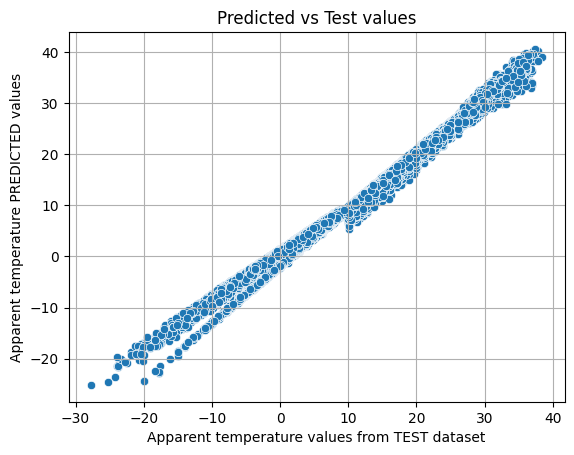

In [13]:
y_test_flat = y_test['Apparent Temperature (C)'].tolist()
sns.scatterplot(x=y_test_flat, y=y_pred_flat)
plt.xlabel('Apparent temperature values from TEST dataset')
plt.ylabel('Apparent temperature PREDICTED values')
plt.title('Predicted vs Test values') 
plt.grid(True)
plt.show() 

In [15]:
#Let's determine the MSE, MAS
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("MSE: ",mean_squared_error(y_test_flat, y_pred_flat))
print("MAS: ",mean_absolute_error(y_test_flat, y_pred_flat))


MSE:  1.1562905214173007
MAS:  0.8481089710736034


## Residual analysis 

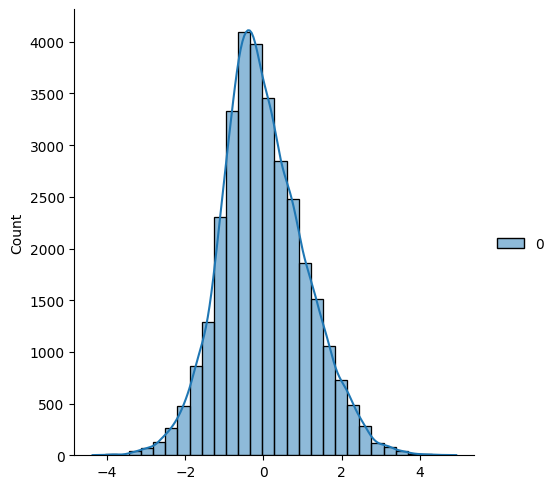

In [18]:
y_test_flat = pd.DataFrame(y_test_flat)
y_pred_flat = pd.DataFrame(y_pred_flat)

residuals = y_test_flat - y_pred_flat 
#residuals 

sns.displot(residuals, kde=True, bins=30)


### Kind of looks like a normal distribution.. So, we are good here. 

## Answer1: Yes, you can predict the apparent temperature given the humidity but along with other variables.

## Question2: Can you predict the apparent temperature given just the humidity?


In [21]:
x_dataset_humid = raw_dataset_cleansed['Humidity']
y_dataset_humid = raw_dataset_cleansed['Apparent Temperature (C)']

x_train_humid, x_test_humid, y_train_humid, y_test_humid = train_test_split(
    x_dataset_humid, y_dataset_humid, test_size=0.33, random_state=42)


x_train_humid = pd.DataFrame(x_train_humid )
x_test_humid = pd.DataFrame(x_test_humid)
y_train_humid = pd.DataFrame(y_train_humid)
y_test_humid = pd.DataFrame(y_test_humid)

In [22]:
regr_humid = linear_model.LinearRegression()

#Train the model 
regr_humid.fit(x_train_humid, y_train_humid)

#Make predictions for y(apparent temperature) 
y_pred_humid = regr_humid.predict(x_test_humid)


In [23]:
print("\nR^2 value:",regr_humid.score(x_train_humid, y_train_humid))
print("The coefficients are: ", regr_humid.coef_) 
print("The intercept is: ", regr_humid.intercept_) 


R^2 value: 0.3670665552657658
The coefficients are:  [[-33.11987138]]
The intercept is:  [35.21153014]


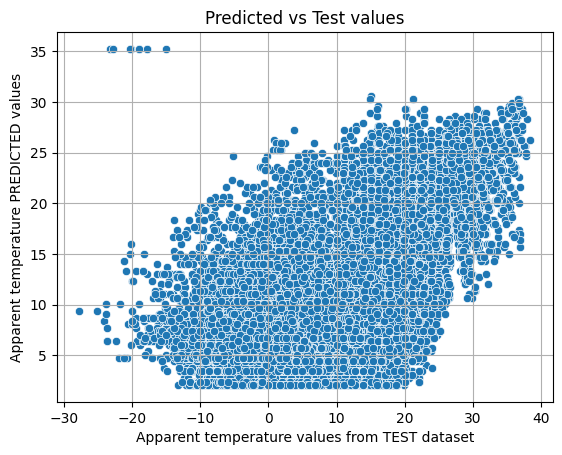

In [24]:
y_pred_humid_flat = [item[0] for item in y_pred_humid]
#y_test_flat = [item[0] for item in y_test]

y_test_humid_flat = y_test_humid['Apparent Temperature (C)'].tolist()
sns.scatterplot(x=y_test_humid_flat, y=y_pred_humid_flat)
plt.xlabel('Apparent temperature values from TEST dataset')
plt.ylabel('Apparent temperature PREDICTED values')
plt.title('Predicted vs Test values') 
plt.grid(True)
plt.show() 

In [25]:
#Let's find the MSE and MAS for this model

print("MSE: ",mean_squared_error(y_test_humid_flat, y_pred_humid_flat))
print("MAS: ",mean_absolute_error(y_test_humid_flat, y_pred_humid_flat))


MSE:  74.05236330380916
MAS:  6.9968831342269135


### _You can see the MSE for this model is about ~74 and for the previous model was 1.15. Simialrly, the MAS for this model is ~7 and for the previous model was 0.84_

## Answer2: No, you can't predict the apparent temperature given just the humidity.

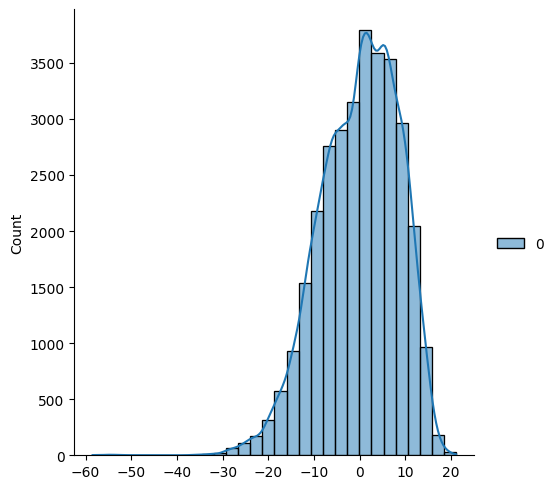

In [27]:
# Residual analysis for the 2nd model 
y_test_humid_flat = pd.DataFrame(y_test_humid_flat)
y_pred_humid_flat = pd.DataFrame(y_pred_humid_flat)

residuals = y_test_humid_flat - y_pred_humid_flat 
#residuals 

sns.displot(residuals, kde=True, bins=30)

### _Well, this does somewhat resemble a normal distribution but not to the extent the residual from the previous model._ 